In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

dir_name = os.getcwd()
file_name = os.path.join(dir_name,"sensor_data_600.txt")

# with open(file_name,"r",encoding='utf-8') as file:
#     data = file.read()
data = pd.read_csv(file_name,delimiter=" ",header=None,names=("date","time","ir","lidar"))
data.head()

,date,time,ir,lidar
0,20180202,110001,28,627
1,20180202,110004,17,626
2,20180202,110007,14,627
3,20180202,110010,31,622
4,20180202,110013,24,630


<Axes: >

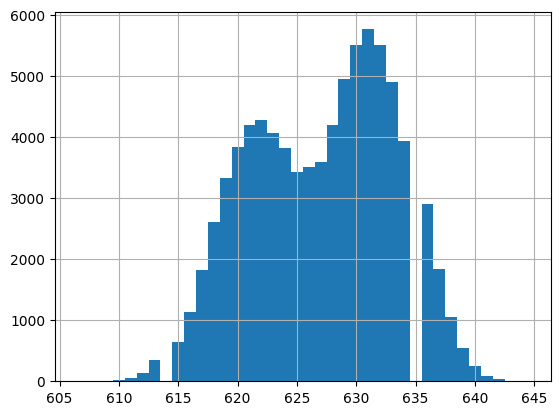

In [4]:
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]),align='left')


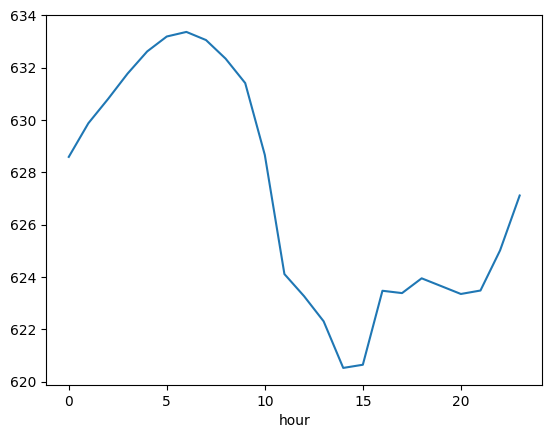

In [5]:

data["hour"] = [e//10000 for e in data.time]  ###hourly_mean###
d = data.groupby("hour")
d.lidar.mean().plot()
plt.show()

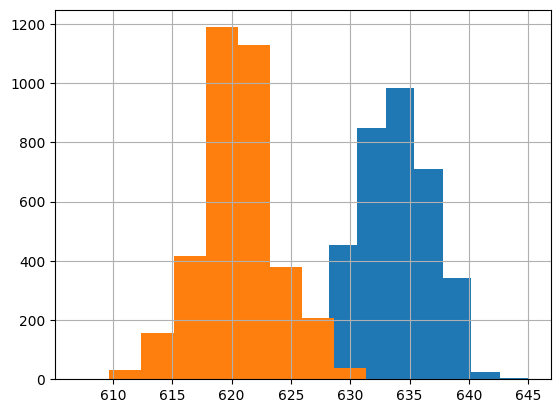

In [6]:
d.lidar.get_group(6).hist()     ###two_mode_hist###
d.lidar.get_group(14).hist()
plt.show()

In [7]:
each_hour = { i : d.lidar.get_group(i).value_counts().sort_index()  for i in range(24)} #時間ごとにデータフレームを作成  ###calc_joint_probs
freqs = pd.concat(each_hour, axis=1) #concatで連結
freqs = freqs.fillna(0)     #欠損値(NaN)を0で埋める
probs = freqs/len(data) #頻度を確率で

probs #表示

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
lidar,,,,,,,,,,,,,,,,,,,,,
618,0.000036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004326,0.003791,0.001106,0.001750,0.001774,0.002272,0.002916,0.003135,0.001908,0.000401
619,0.000219,0.000049,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004982,0.004301,0.001810,0.002697,0.002309,0.003341,0.003657,0.003475,0.002539,0.000729
620,0.000389,0.000073,0.000036,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005140,0.005371,0.002892,0.003013,0.002710,0.004119,0.003900,0.003621,0.002685,0.001021
621,0.000559,0.000158,0.000036,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000,0.000000,...,0.004921,0.005650,0.003912,0.003706,0.003196,0.004435,0.003512,0.003985,0.003451,0.001895
622,0.001033,0.000219,0.000085,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000061,...,0.004799,0.005030,0.005407,0.004411,0.004180,0.003755,0.003062,0.003038,0.003475,0.002333
623,0.001604,0.000535,0.000231,0.000036,0.000049,0.000012,0.000012,0.000024,0.000012,0.000036,...,0.003985,0.003888,0.006185,0.004471,0.003864,0.002710,0.002357,0.002345,0.003268,0.003268
624,0.002175,0.000972,0.000547,0.000194,0.000061,0.000049,0.000024,0.000049,0.000097,0.000134,...,0.002782,0.003171,0.005553,0.004338,0.004301,0.002539,0.001835,0.001944,0.002685,0.003475
625,0.003062,0.001823,0.000911,0.000462,0.000146,0.000049,0.000085,0.000109,0.000292,0.000413,...,0.001823,0.002248,0.005152,0.003937,0.003669,0.001847,0.001106,0.001349,0.002369,0.003062
626,0.003742,0.002685,0.001507,0.001094,0.000462,0.000243,0.000219,0.000377,0.000559,0.000668,...,0.001349,0.001434,0.003755,0.003402,0.003524,0.001944,0.001252,0.001057,0.002066,0.003548


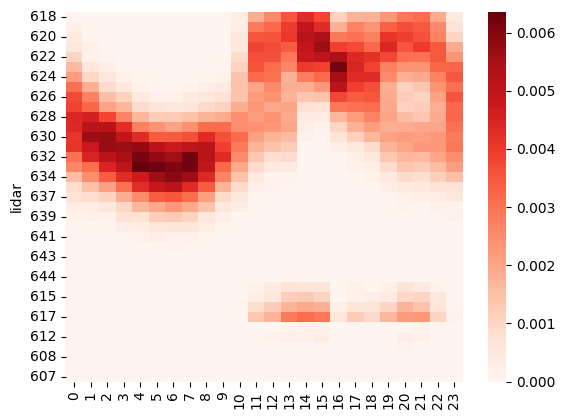

In [8]:
import seaborn as sns   ###2d_hist （下のセルも）

sns.heatmap(probs, cmap="Reds")
plt.show()

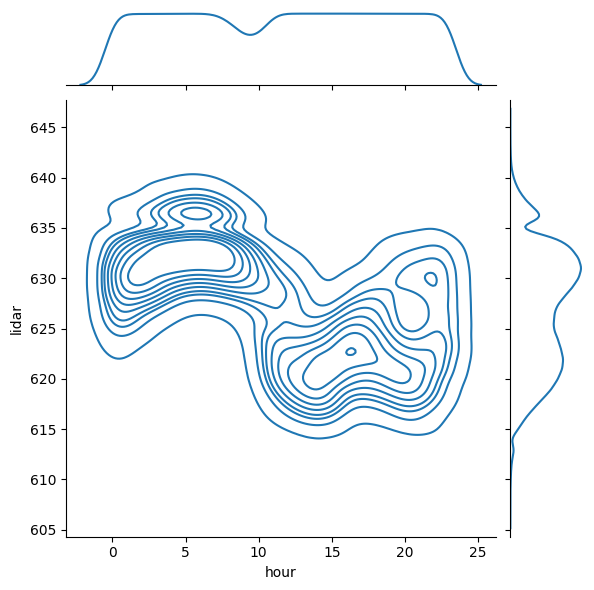

In [12]:
sns.jointplot(data, x="hour", y="lidar", kind="kde") #古いバージョン: sns.jointplot(data["hour"], data["lidar"], data, kind="kde")
plt.show()